In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data.csv')


data = data.drop(columns=['Timestamp', '1. Name'])


data['2. Age'] = data['2. Age'].apply(lambda x: int(x.split()[0]))


categorical_columns = ['4. Religion', '5. Ethnicity', '6. Where did you spend the majority of your childhood?']
for col in categorical_columns:
    mode_value = data[col].mode()[0] 
    data[col] = data[col].fillna(mode_value)  


binary_mapping = {'No': 0, 'Yes': 1}
binary_map = {'Unacceptable': 0, 'Acceptable': 1}
data['12. Do you know where to find information or support for mental health issues on your campus?'] = data['12. Do you know where to find information or support for mental health issues on your campus?'].map(binary_mapping)
data['14. In my culture, seeking help for mental health issues is seen as...'] = data['14. In my culture, seeking help for mental health issues is seen as...'].map(binary_map)
data['19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'] = data['19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'].map(binary_mapping)


data = pd.get_dummies(data, columns=['18. Does your community have cultural beliefs or practices that affect how people view mental health? If yes, do these beliefs generally have a positive or negative impact?'], prefix='cultural_beliefs')


data.dropna(inplace=True)

perception_columns = [
    '8. Mental illness is a sign of personal weakness.',
    '9. People with mental illness are dangerous.',
    '10. Mental illness is a taboo subject in my culture.',
    '11. Mental illness can be effectively treated with appropriate support and treatment.'
]

know_where_to_find_info = '12. Do you know where to find information or support for mental health issues on your campus?'
cultural_beliefs_impact_mental_health = 'cultural_beliefs_Yes, positively'
feel_comfortable_seeking_help = '13. I would feel comfortable seeking help for mental health issues if needed.'
seek_help_if_no_negative_impact = '14. In my culture, seeking help for mental health issues is seen as...'
seek_help_cultural_perception = '15. I would seek help for mental health issues if I knew it would not negatively impact my social, academic, or professional reputation.'
stigma_discrimination = '19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'


data['mental_health_awareness'] = (data[know_where_to_find_info] + data[cultural_beliefs_impact_mental_health]) / 2

data['help_seeking_behaviors'] = (data[feel_comfortable_seeking_help] + data[seek_help_if_no_negative_impact] + data[seek_help_cultural_perception]) / 3


data['perception_mental_health'] = data[perception_columns].mean(axis=1)
correlation_perception = data[stigma_discrimination].corr(data['perception_mental_health'])


correlation_mental_health = data[stigma_discrimination].corr(data['mental_health_awareness'])

correlation_help_seeking = data[stigma_discrimination].corr(data['help_seeking_behaviors'])

print("Correlation between stigma and discrimination and mental health awareness:", correlation_mental_health)
print("Correlation between stigma and discrimination and help-seeking behaviors:", correlation_help_seeking)


Correlation between stigma and discrimination and mental health awareness: 0.199103932959142
Correlation between stigma and discrimination and help-seeking behaviors: -0.013883658206967289


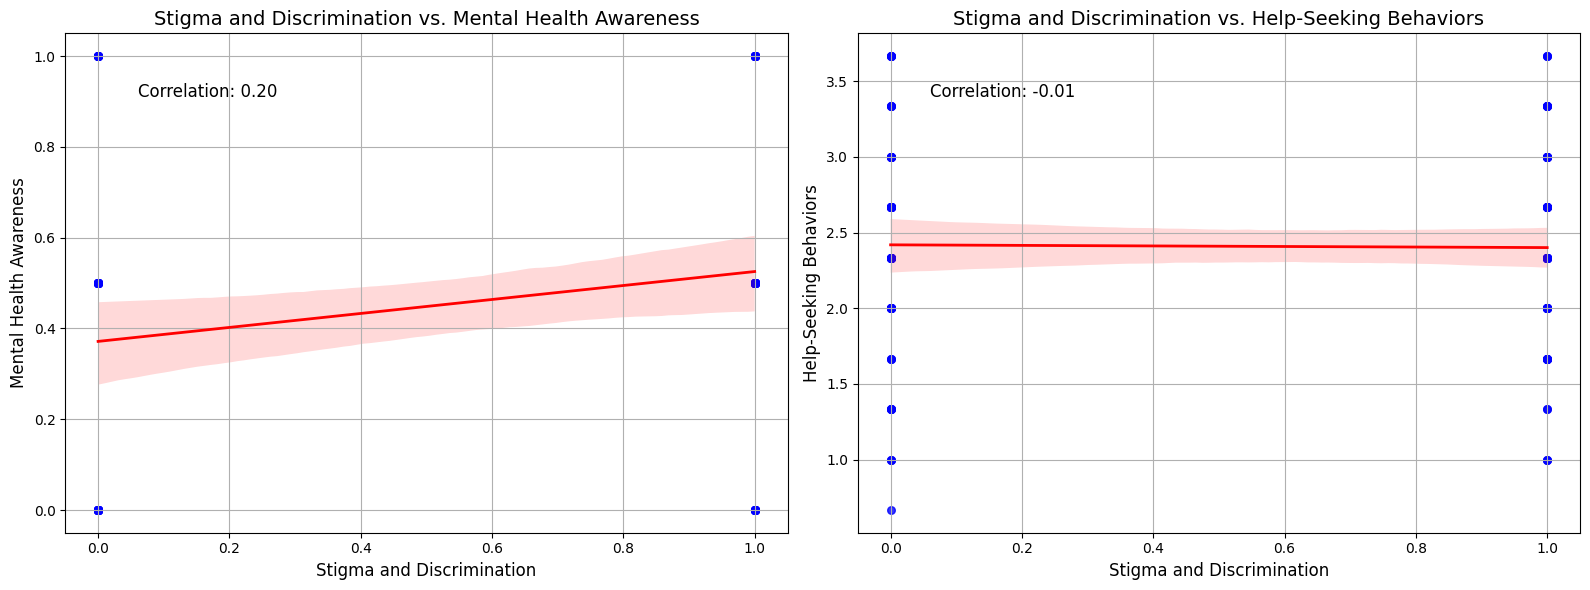

In [14]:

plt.figure(figsize=(16, 6)) 

plt.subplot(1, 2, 1)
sns.regplot(x=data[stigma_discrimination], y=data['mental_health_awareness'], scatter_kws={'color': 'blue', 's': 30},  
            line_kws={'color': 'red', 'linewidth': 2}) 
plt.title('Stigma and Discrimination vs. Mental Health Awareness', fontsize=14)  
plt.xlabel('Stigma and Discrimination', fontsize=12)  
plt.ylabel('Mental Health Awareness', fontsize=12) 
plt.grid(True)


correlation_mental_health = data[stigma_discrimination].corr(data['mental_health_awareness'])
plt.text(0.1, 0.9, f'Correlation: {correlation_mental_health:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.subplot(1, 2, 2)
sns.regplot(x=data[stigma_discrimination], y=data['help_seeking_behaviors'], scatter_kws={'color': 'blue', 's': 30},  
            line_kws={'color': 'red', 'linewidth': 2})  
plt.title('Stigma and Discrimination vs. Help-Seeking Behaviors', fontsize=14)  
plt.xlabel('Stigma and Discrimination', fontsize=12) 
plt.ylabel('Help-Seeking Behaviors', fontsize=12)  
plt.grid(True) 


correlation_help_seeking = data[stigma_discrimination].corr(data['help_seeking_behaviors'])
plt.text(0.1, 0.9, f'Correlation: {correlation_help_seeking:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

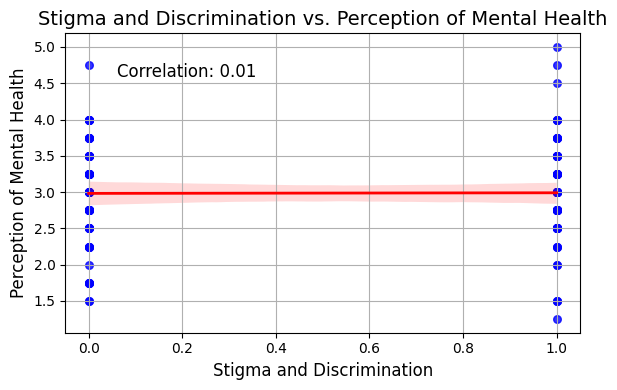

In [15]:

plt.figure(figsize=(6, 4)) 

sns.regplot(x=data[stigma_discrimination], y=data['perception_mental_health'], scatter_kws={'color': 'blue', 's': 30},  
            line_kws={'color': 'red', 'linewidth': 2})  
plt.title('Stigma and Discrimination vs. Perception of Mental Health', fontsize=14)  
plt.xlabel('Stigma and Discrimination', fontsize=12)  
plt.ylabel('Perception of Mental Health', fontsize=12)  
plt.grid(True)  


correlation_perception = data[stigma_discrimination].corr(data['perception_mental_health'])
plt.text(0.1, 0.9, f'Correlation: {correlation_perception:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

Central Tendency:
           2. Age  mental_health_awareness  help_seeking_behaviors
count  149.000000               149.000000              149.000000
mean    19.993289                 0.453020                2.409396
std      3.486454                 0.387047                0.656591
min     18.000000                 0.000000                0.666667
25%     18.000000                 0.000000                2.000000
50%     18.000000                 0.500000                2.333333
75%     25.000000                 1.000000                3.000000
max     31.000000                 1.000000                3.666667

Dispersion:
2. Age                     12.155360
mental_health_awareness     0.149805
help_seeking_behaviors      0.431112
dtype: float64
2. Age                     3.486454
mental_health_awareness    0.387047
help_seeking_behaviors     0.656591
dtype: float64


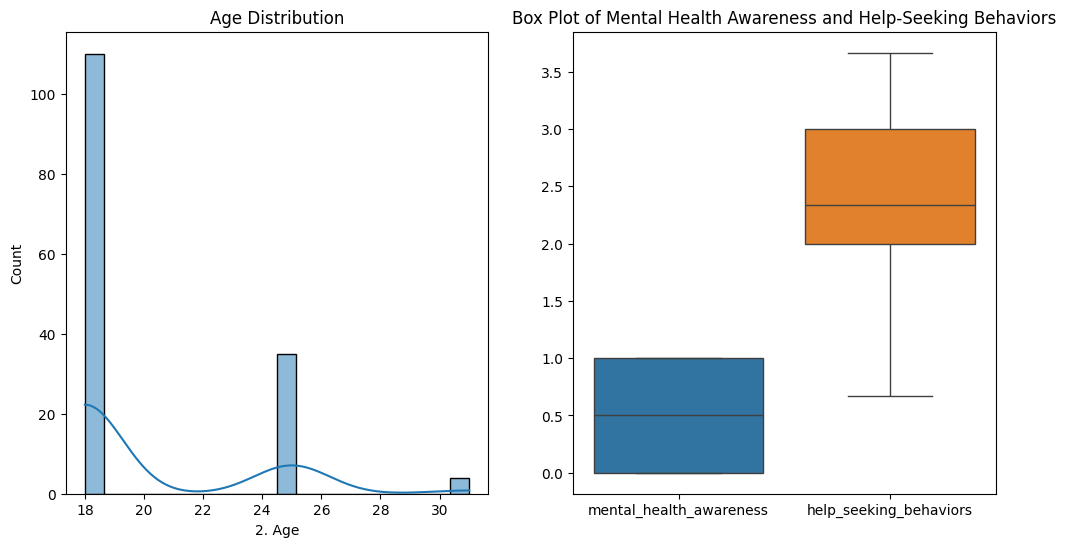

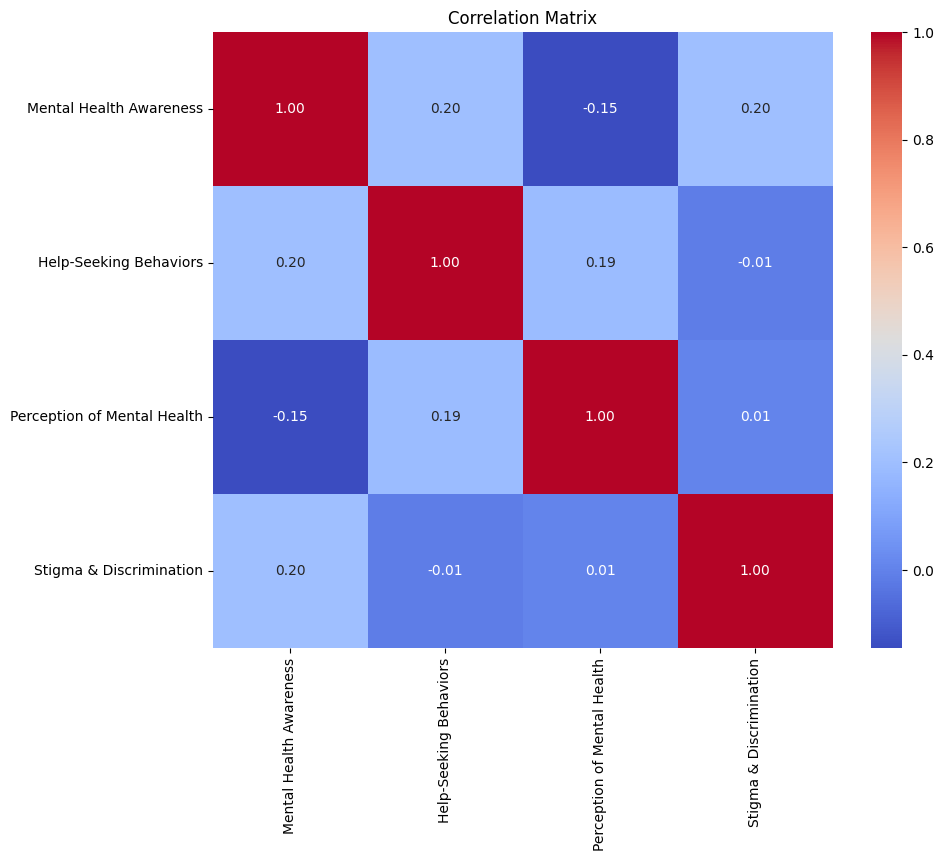

In [16]:

print("Central Tendency:")
print(data[['2. Age', 'mental_health_awareness', 'help_seeking_behaviors']].describe())


print("\nDispersion:")
print(data[['2. Age', 'mental_health_awareness', 'help_seeking_behaviors']].var())
print(data[['2. Age', 'mental_health_awareness', 'help_seeking_behaviors']].std())


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['2. Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=data[['mental_health_awareness', 'help_seeking_behaviors']])
plt.title('Box Plot of Mental Health Awareness and Help-Seeking Behaviors')
plt.show()


column_labels = {
    'mental_health_awareness': 'Mental Health Awareness',
    'help_seeking_behaviors': 'Help-Seeking Behaviors',
    'perception_mental_health': 'Perception of Mental Health',
    '19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?': 'Stigma & Discrimination'
}

correlation_matrix = data[['mental_health_awareness', 'help_seeking_behaviors', 'perception_mental_health', '19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?']].corr()

correlation_matrix = correlation_matrix.rename(columns=column_labels, index=column_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



                              Mean  Median  Mode  Standard Deviation  Variance
perception_mental_health  2.986577     3.0  2.75            0.685753  0.470258


<Figure size 1200x800 with 0 Axes>

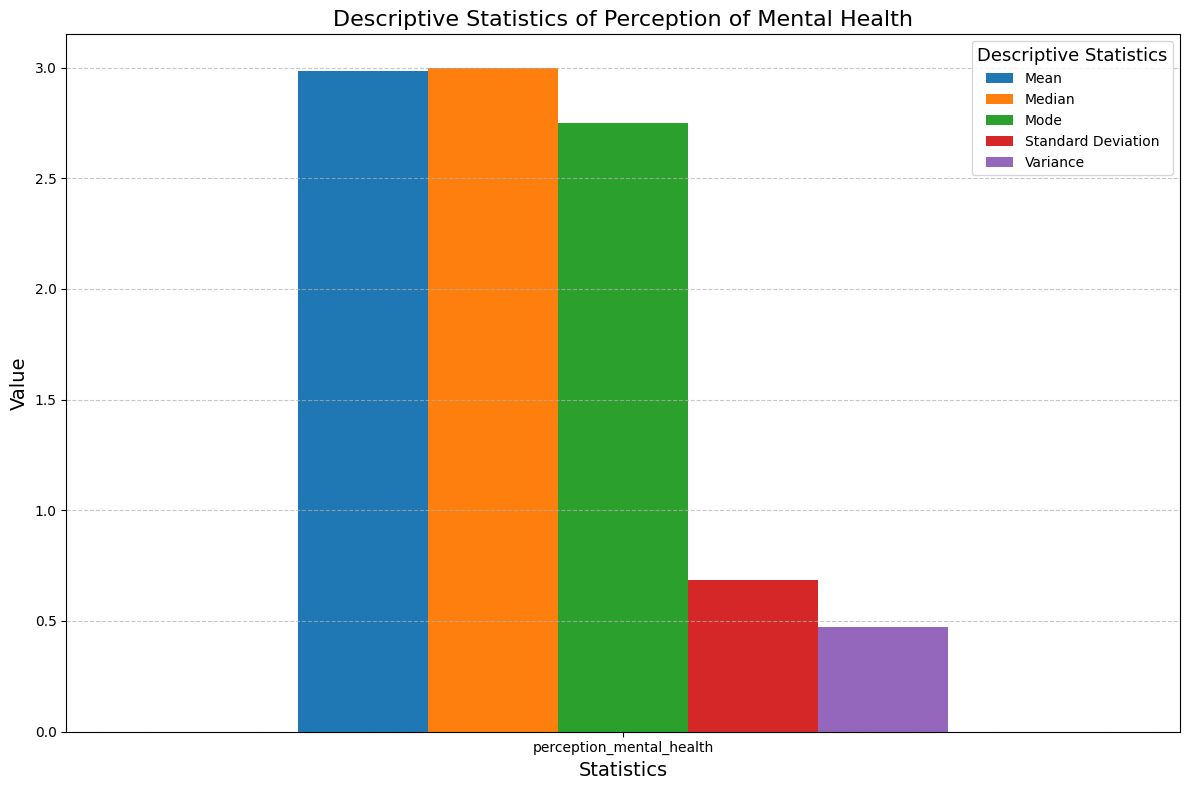

In [17]:

perception_stats = {
    'Mean': data['perception_mental_health'].mean(),
    'Median': data['perception_mental_health'].median(),
    'Mode': data['perception_mental_health'].mode().iloc[0],  
    'Standard Deviation': data['perception_mental_health'].std(),
    'Variance': data['perception_mental_health'].var()
}


perception_stats_df = pd.DataFrame(perception_stats, index=['perception_mental_health'])
print(perception_stats_df)
# Plotting
plt.figure(figsize=(12, 8))


perception_stats_df.plot(kind='bar', figsize=(12, 8), width=0.7)


plt.title('Descriptive Statistics of Perception of Mental Health', fontsize=16)
plt.xlabel('Statistics', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Descriptive Statistics', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


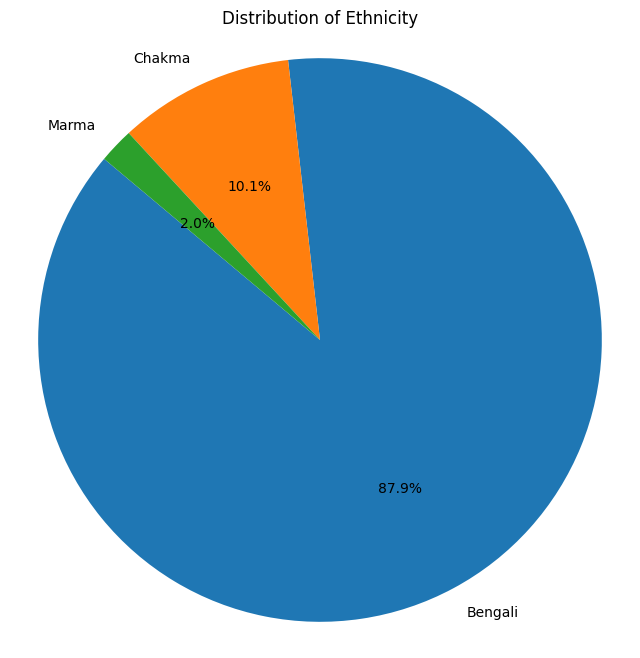

In [18]:

ethnicity_counts = data['5. Ethnicity'].value_counts()


plt.figure(figsize=(8, 8))

plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Ethnicity')


plt.axis('equal')  
plt.show()

                        Perception  Awareness  Help Seeking Behaviors  \
Perception                1.000000  -0.145588                0.188612   
Awareness                -0.145588   1.000000                0.200270   
Help Seeking Behaviors    0.188612   0.200270                1.000000   
Bengali                  -0.007280   0.034934                0.095536   
Chakma                    0.006571  -0.045987               -0.016166   
Marma                     0.002815   0.017458               -0.187037   

                         Bengali    Chakma     Marma  
Perception             -0.007280  0.006571  0.002815  
Awareness               0.034934 -0.045987  0.017458  
Help Seeking Behaviors  0.095536 -0.016166 -0.187037  
Bengali                 1.000000 -0.902594 -0.386708  
Chakma                 -0.902594  1.000000 -0.047960  
Marma                  -0.386708 -0.047960  1.000000  


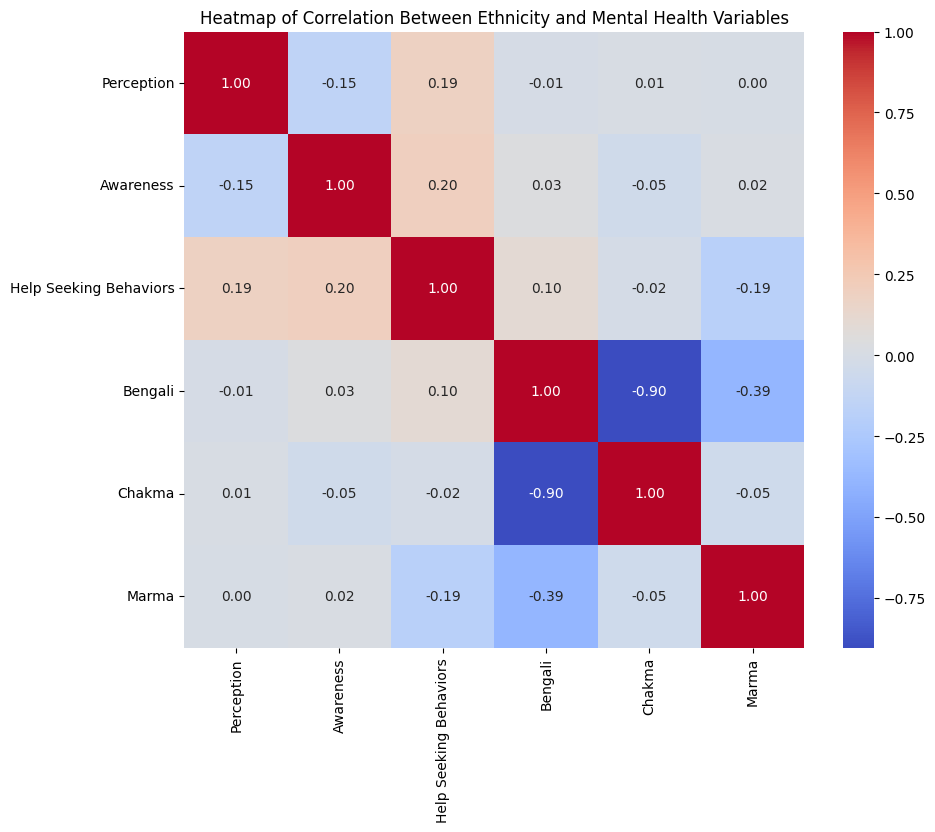

In [19]:

data_with_dummies_ethnicity = pd.get_dummies(data, columns=['5. Ethnicity'])

column_mapping = {
    'perception_mental_health': 'Perception',
    'mental_health_awareness': 'Awareness',
    'help_seeking_behaviors': 'Help Seeking Behaviors',
    '5. Ethnicity_Bengali': 'Bengali',
    '5. Ethnicity_Chakma': 'Chakma',
    '5. Ethnicity_Marma': 'Marma',
}


heatmap_data = data_with_dummies_ethnicity[list(column_mapping.keys())].copy()


heatmap_data.rename(columns=column_mapping, inplace=True)


correlation_matrix = heatmap_data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Ethnicity and Mental Health Variables')
plt.show()


              Perception  Awareness  Help Seeking  Urban Area  Rural Area
Perception      1.000000  -0.145588      0.188612   -0.042428    0.042428
Awareness      -0.145588   1.000000      0.200270    0.064785   -0.064785
Help Seeking    0.188612   0.200270      1.000000    0.304364   -0.304364
Urban Area     -0.042428   0.064785      0.304364    1.000000   -1.000000
Rural Area      0.042428  -0.064785     -0.304364   -1.000000    1.000000


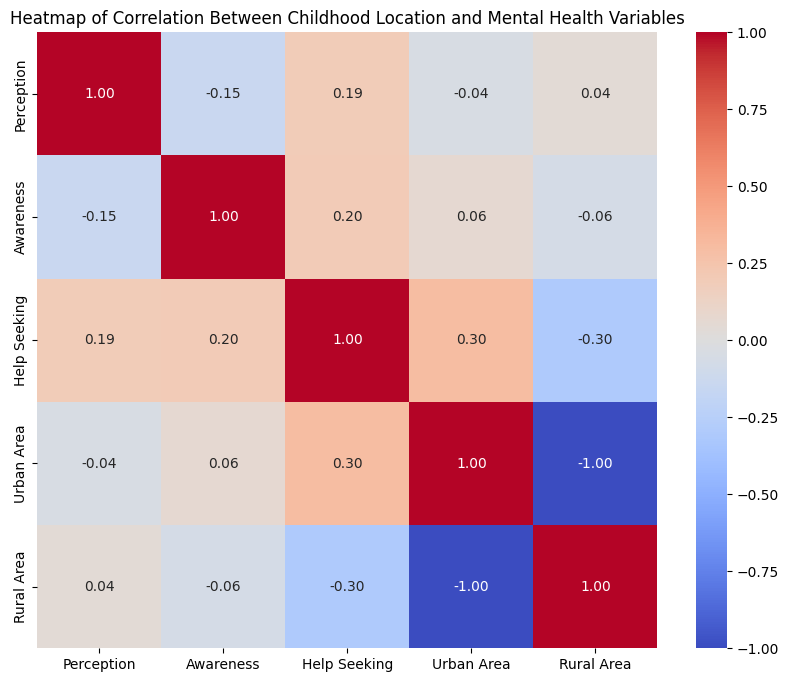

In [47]:

data_with_dummies_childhood = pd.get_dummies(data, columns=['6. Where did you spend the majority of your childhood?'], prefix='childhood')


column_mapping_childhood = {
    'perception_mental_health': 'Perception',
    'mental_health_awareness': 'Awareness',
    'help_seeking_behaviors': 'Help Seeking',
    'childhood_Urban Area': 'Urban Area',
    'childhood_Rural Area': 'Rural Area',
}


heatmap_data_childhood = data_with_dummies_childhood[list(column_mapping_childhood.keys())].copy()


heatmap_data_childhood.rename(columns=column_mapping_childhood, inplace=True)


correlation_matrix_childhood = heatmap_data_childhood.corr()
print(correlation_matrix_childhood)

plt.figure(figsize=(10, 8))
heatmap_childhood = sns.heatmap(correlation_matrix_childhood, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Correlation Between Childhood Location and Mental Health Variables')

plt.show()


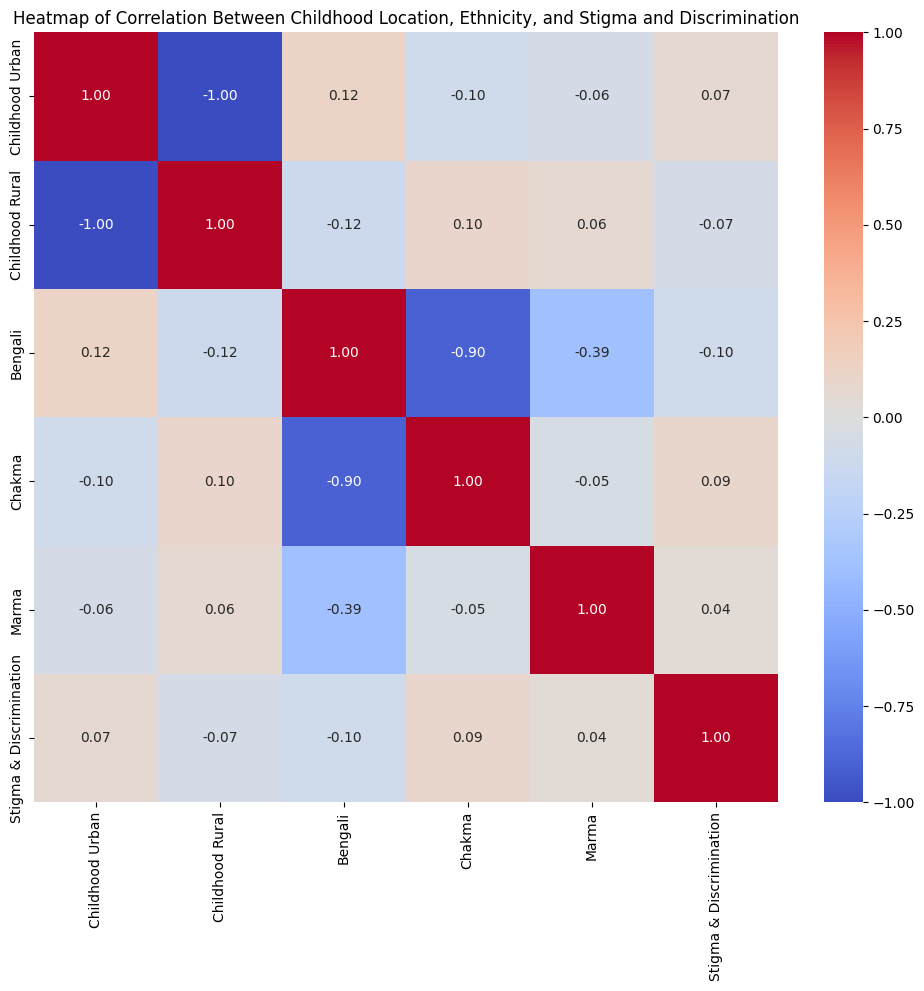

Correlation Matrix:
                         Childhood Urban  Childhood Rural   Bengali    Chakma  \
Childhood Urban                 1.000000        -1.000000  0.120302 -0.101111   
Childhood Rural                -1.000000         1.000000 -0.120302  0.101111   
Bengali                         0.120302        -0.120302  1.000000 -0.902594   
Chakma                         -0.101111         0.101111 -0.902594  1.000000   
Marma                          -0.062530         0.062530 -0.386708 -0.047960   
Stigma & Discrimination         0.068215        -0.068215 -0.101355  0.091483   

                            Marma  Stigma & Discrimination  
Childhood Urban         -0.062530                 0.068215  
Childhood Rural          0.062530                -0.068215  
Bengali                 -0.386708                -0.101355  
Chakma                  -0.047960                 0.091483  
Marma                    1.000000                 0.039195  
Stigma & Discrimination  0.039195             

In [48]:
column_mapping_combined = {
    'childhood_Urban Area': 'Childhood Urban',
    'childhood_Rural Area': 'Childhood Rural',
    '19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?': 'Stigma & Discrimination',
    '5. Ethnicity_Bengali': 'Bengali',
    '5. Ethnicity_Chakma': 'Chakma',
    '5. Ethnicity_Marma': 'Marma',
 }
heatmap_data_combined = pd.concat([data_with_dummies_childhood[['childhood_Urban Area', 'childhood_Rural Area']], 
                                   data_with_dummies_ethnicity[['5. Ethnicity_Bengali', '5. Ethnicity_Chakma', '5. Ethnicity_Marma']], 
                                   data['19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?']], 
                                   axis=1)

heatmap_data_combined.rename(columns=column_mapping_combined, inplace=True)

correlation_matrix_combined = heatmap_data_combined.corr()


plt.figure(figsize=(12, 10))
heatmap_combined = sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")


plt.xticks(rotation=90)


plt.yticks(rotation=90)


plt.title('Heatmap of Correlation Between Childhood Location, Ethnicity, and Stigma and Discrimination')
plt.show()


print("Correlation Matrix:")
print(correlation_matrix_combined)

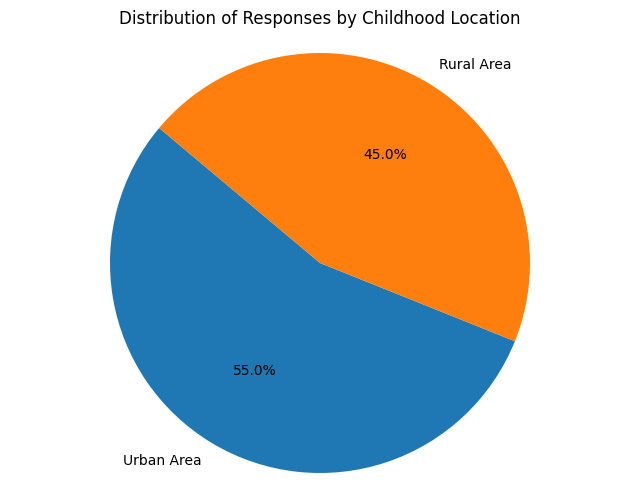

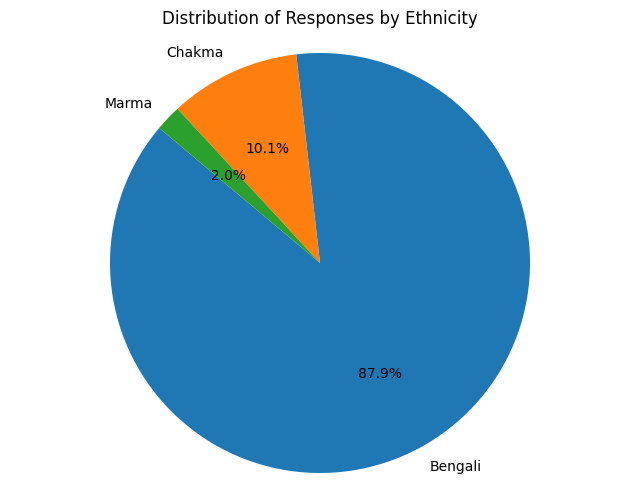

In [49]:

childhood_counts = data['6. Where did you spend the majority of your childhood?'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(childhood_counts, labels=childhood_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Responses by Childhood Location')
plt.axis('equal')  
plt.show()


ethnicity_counts = data['5. Ethnicity'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Responses by Ethnicity')
plt.axis('equal')  
plt.show()

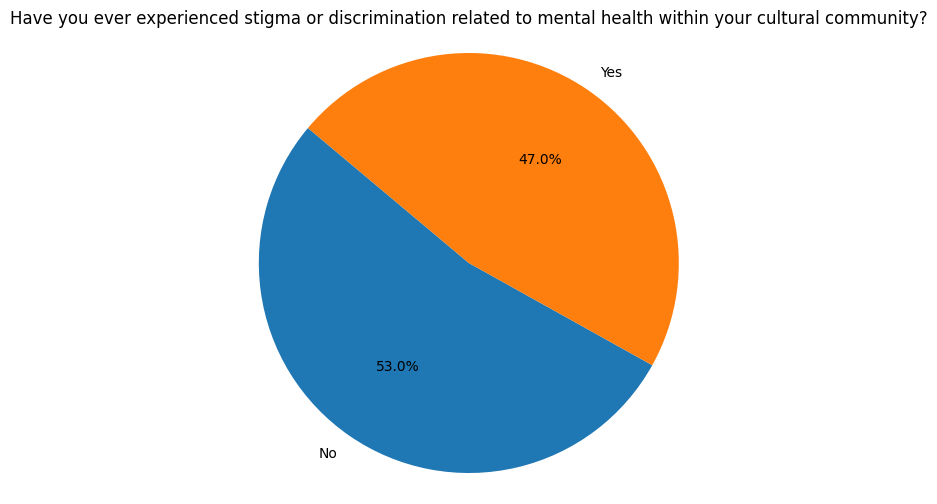

In [52]:

stigma_counts = data['19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'].map({0: 'Yes', 1: 'No'}).value_counts()


plt.figure(figsize=(8, 6))
plt.pie(stigma_counts, labels=stigma_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Have you ever experienced stigma or discrimination related to mental health within your cultural community?')
plt.axis('equal')  
plt.show()
